# 🪐 Auto Regressive Model
Truly, after reading this notebook — you will say: *"That's freakin' old!"* <br>
Excited?

Let's uncover.

___

First of all, **what is auto-regressive**?

From the internet:
> A statistical model is autoregressive *if it predicts future values **based on past values** (i.e., predicting future stock prices based on past performance)*.

That's correct! Here, we will see the *diagram* or say *ASCII diagram* that I have shown you in the initial lectures of this note-course!

- The AR model is made in such a way that the values which are going to come after will depend on the `p` past values.
- Then according to the horizon `h` we can *"reassign"* the currently predicted value as an input to predict the next value.
- (spoiler) it is the same old school like linear regression model. Sorry, don't read it.

### 

## 🔗 An Auto Regressive Model

This is the model which is made of a structure which is ***very*** similar to the linear regression.

Author's terms:
> Auto regressive models are the linear regression where the predictors are passed in as the **past values** and the output is the new value to forecast.

So, the equation will be:

# $$ \hat y_t = b + \varphi_1y_{t - 1} + \varphi_2y_{t - 2} + \cdots + \varphi_py_{t - p}$$

Recall which is the similar as *(writing in small latters)*:

### $$ \hat y = \beta_0 + \beta_1x_1 + \beta_2x_2 + \cdots + \beta_3x_n$$

Where, <br>
$\varphi:$ represents the weight or slope of the perticular $y$ on that time. Which means: *"how much weight is to be given to that data to predict next datapoint"*. <br>
$p:$ is the total number of past data to consider. Here if the p is 3 then past `t-1`, `t-2`, `t-3` will be considered.

> **Note**: The character $\varphi$ is called: "phi" and in LaTeX it is written as `\varphi`.

###### 

### 🛤 A Side Track

Out habit is to write the linear equation in this form: $ \hat y_t = b + \varphi_1y_{t - 1} + \varphi_2y_{t - 2} + \cdots + \varphi_py_{t - p}$ but in reality... ***things are not linear***. 

Meaning there are some **noises** which cause the ups and downs in the values — not making them linear. They are called: *irreducible errors*. And repredented by:

### $$ \hat y_t = b + \varphi_1y_{t - 1} + \varphi_2y_{t - 2} + \cdots + \varphi_py_{t - p} + \varepsilon_t$$

That means, the $\varepsilon$ (the error term) causes the random changes in the value. Not making it *perfectly* predictable. And ***one of the assumptions*** of linear regression is that the error is **normally distributed**. And that means, the term $\varepsilon$ comes from the normal distribution: $\varepsilon \sim \aleph (0, \sigma^2)$

> **NOTE:** The symbol $\aleph$ is called "aleph" and is written in LaTeX as `\aleph`.

###### 

#### Back from the side track
Let's see how the AR(p) model works. As I told you just before this section, that the ASCII chart will come in help for us to understand the AR(p) model. The chart below is just that.

We have the 3 days of data till now and are predicting `2` days in the future. So...

<pre>
                      ┌────────┐
┌───┐  ┌───┐  ┌───┐   │        │     ┌──────────┐
│ 1 ├──┤ 2 ├──┤ 3 ├──►│ MODEL  ├────►│ Pred: 4  │
└───┘  └───┘  └───┘   │        │     └──────────┘
                      └────────┘
</pre>

Here, our `p = 3` and `h = 2`.

After the first prediction, we will take the output of the first model and then take it as an input of the next model *(kind of regressorChain for multioutput regressor!)*.
                      
<pre>
   \     /                         ┌────────┐
    \───/  ┌───┐  ┌───┐  ┌───┐     │        │     ┌──────────┐
    │\ /├──┤ 2 ├──┤ 3 ├──┤ 4 ├────►│ MODEL  ├────►│          │
    └/\─┘  └───┘  └───┘  └───┘     │        │     └──────────┘  
    /  \                           └────────┘                             
   /    \
    
</pre>

So, **instead of increasing** the number of days, we will **eleminate the first ones** to keep the `p consistant`.

<pre>
                      ┌────────┐
┌───┐  ┌───┐  ┌───┐   │        │     ┌──────────┐
│ 2 ├──┤ 3 ├──┤ 4 ├──►│ MODEL  ├────►│ Pred: 5  │
└───┘  └───┘  └───┘   │        │     └──────────┘
                      └────────┘
</pre>

## 😮 And yes
This model **is not a random walk**. Because instead of depending on the past one instance only, here we are depending on multiple instances. Thus, this model is ***more expressive***!

## 😐 Different from Exponential Smoothing? How?

- **Exponential smoothing** was specific to the: Linear trend and Seasonality only.
- Thus they were so **specific** for such problems.
- We will see that why ARIMA doesn't have such structure.

#### 

## Enough Talk. Show me the code.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20, 10)

from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv("../data/airline_passengers.csv", index_col=0, parse_dates=True)
df = df.Passengers
df.head()

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: Passengers, dtype: int64

In [3]:
train = df.iloc[:-12]
test = df.iloc[-12:]

In [4]:
train = train.values.reshape(-1)

In [5]:
p = 5
X = []
y = []
for i in range(0, len(train) - p):
    X.append(train[i:p+i].tolist())
    y.append(train[p+i])

In [6]:
X = np.array(X)
y = np.array(y)

In [7]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [8]:
preds = []
Xt = X[-1].reshape(1, -1)
for i in range(12):
    pred = model.predict(Xt)[0]
    preds.append(pred)
    Xt = np.c_[Xt, pred][0, -p:].reshape(1, -1)

In [9]:
preds = pd.Series(preds, index=test.index)

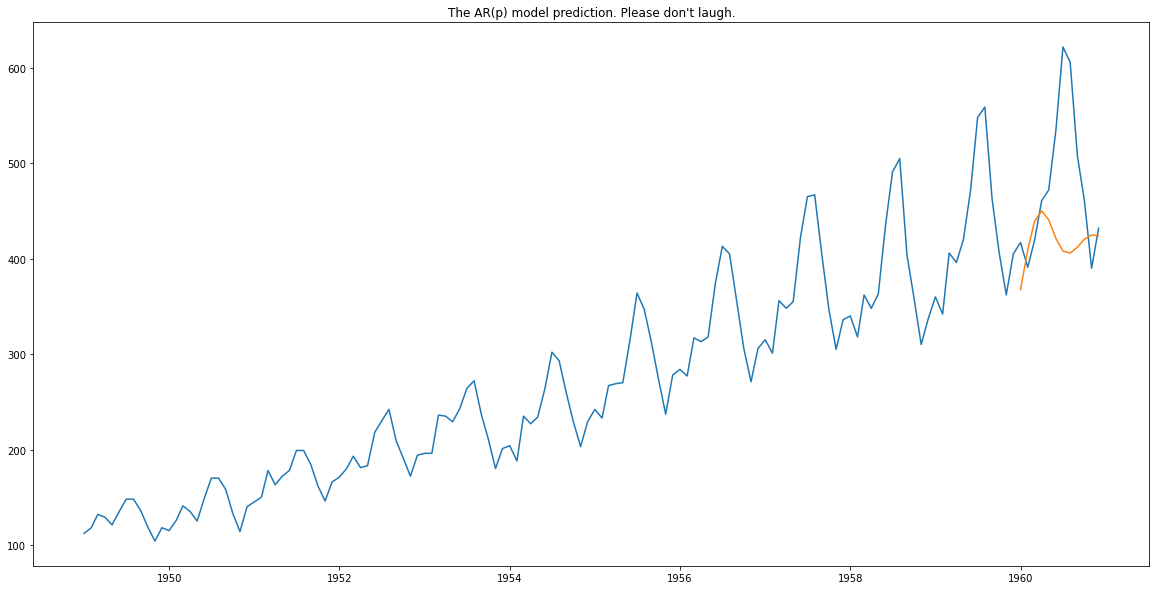

In [10]:
plt.plot(df)
plt.plot(preds)
plt.title("The AR(p) model prediction. Please don't laugh.");

We can take it further. We can forecast for... upcoming 72 months! (6 years)

In [11]:
preds = []
Xt = X[-1].reshape(1, -1)
for i in range(72):
    pred = model.predict(Xt)[0]
    preds.append(pred)
    Xt = np.c_[Xt, pred][0, -p:].reshape(1, -1)

In [12]:
new_idx = pd.date_range(test.index[0], periods=72, freq="M")

In [13]:
preds = pd.Series(preds, index=new_idx)

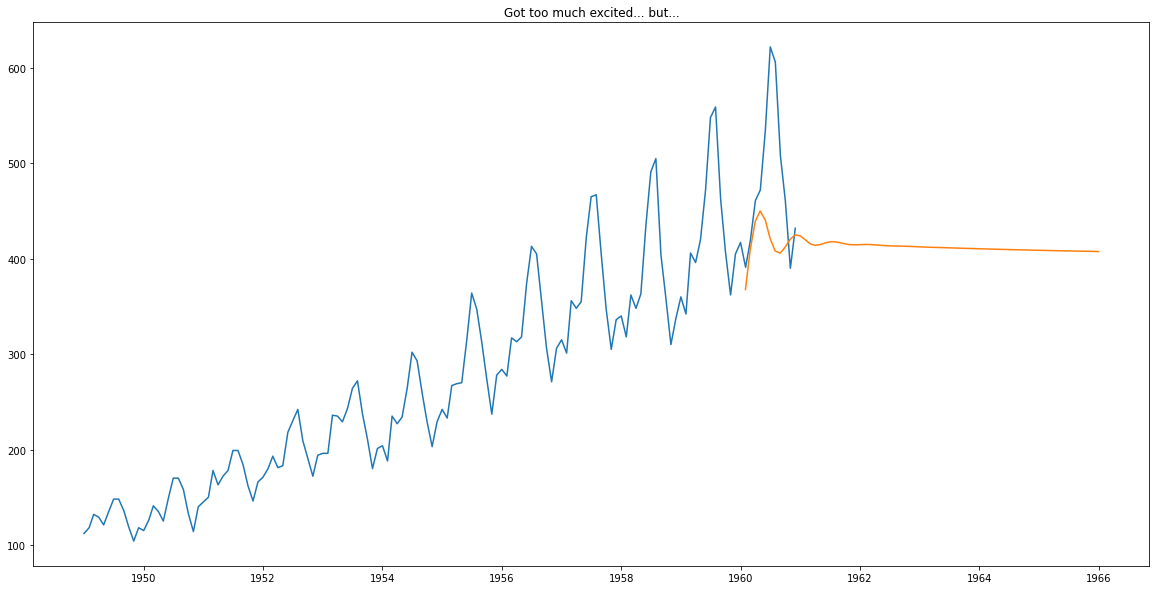

In [14]:
plt.plot(df)
plt.plot(preds)
plt.title("Got too much excited... but...");

See... forecasting too much is not **advised** but for 12 months... it is fine right?

It makes sense right? As our linear model is depending on the previous values... which are predicted by itself it has somewhere to keep producing small results with small changes.

##### 

# That was just an excercise
We will see how things work all together when we will learn ARIMA. But for now just get the gist that this is how it is all about ***AR(p)*** term.